In [1]:
import torch
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor,Resize,Normalize
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
transforms1=transforms.Compose([Resize((224,224)),#each image has to be the same size
                               ToTensor(),#to tensor so 
                               Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])])#normalization assuming imagenet model has 
                                                                                   #has been used  #these happen in order

In [3]:
train_data=ImageFolder(root='E:\\NUST\\Semester 2\\Deep learning\\Assignments\\Assignment 2\\TRAINING_DATA-20210319T144748Z-001\\TRAINING_DATA',
                       transform=transforms1)
test_data=ImageFolder(root='E:\\NUST\\Semester 2\\Deep learning\\Assignments\\Assignment 2\\TEST_DATA-20210319T144744Z-001\\TEST_DATA',transform=transforms1)

In [4]:
#checking the data throughly
print(len(train_data))
print(len(test_data))
print(type(train_data))
print(type(test_data))
print(train_data.classes)
print(test_data.classes)
print(train_data.class_to_idx)
print(test_data.class_to_idx)

360
90
<class 'torchvision.datasets.folder.ImageFolder'>
<class 'torchvision.datasets.folder.ImageFolder'>
['PEPPER', 'POTATO', 'TOMATO']
['PEPPER', 'POTATO', 'TOMATO']
{'PEPPER': 0, 'POTATO': 1, 'TOMATO': 2}
{'PEPPER': 0, 'POTATO': 1, 'TOMATO': 2}


In [5]:
train_data.imgs


[('E:\\NUST\\Semester 2\\Deep learning\\Assignments\\Assignment 2\\TRAINING_DATA-20210319T144748Z-001\\TRAINING_DATA\\PEPPER\\002f87b7-e1a5-49e5-a422-bb423630ded5___JR_HL 8068.JPG',
  0),
 ('E:\\NUST\\Semester 2\\Deep learning\\Assignments\\Assignment 2\\TRAINING_DATA-20210319T144748Z-001\\TRAINING_DATA\\PEPPER\\01d03cb9-4505-458c-a6dc-648dedccd71a___JR_HL 8474.JPG',
  0),
 ('E:\\NUST\\Semester 2\\Deep learning\\Assignments\\Assignment 2\\TRAINING_DATA-20210319T144748Z-001\\TRAINING_DATA\\PEPPER\\01dd93b0-0e34-447b-87ea-ccc9f2b62d03___JR_HL 8005.JPG',
  0),
 ('E:\\NUST\\Semester 2\\Deep learning\\Assignments\\Assignment 2\\TRAINING_DATA-20210319T144748Z-001\\TRAINING_DATA\\PEPPER\\01fbd010-0cc1-4c48-98bc-49e328bf9bbc___JR_HL 8584.JPG',
  0),
 ('E:\\NUST\\Semester 2\\Deep learning\\Assignments\\Assignment 2\\TRAINING_DATA-20210319T144748Z-001\\TRAINING_DATA\\PEPPER\\02a7d2e5-9169-4856-9683-d4fa9894e012___JR_HL 8002.JPG',
  0),
 ('E:\\NUST\\Semester 2\\Deep learning\\Assignments\\Assignm

In [6]:
test_data.imgs

[('E:\\NUST\\Semester 2\\Deep learning\\Assignments\\Assignment 2\\TEST_DATA-20210319T144744Z-001\\TEST_DATA\\PEPPER\\Pepper Healthy.JPG',
  0),
 ('E:\\NUST\\Semester 2\\Deep learning\\Assignments\\Assignment 2\\TEST_DATA-20210319T144744Z-001\\TEST_DATA\\PEPPER\\fbe21117-1f7e-4681-9e8c-e1741c8878dc___JR_HL 7574.JPG',
  0),
 ('E:\\NUST\\Semester 2\\Deep learning\\Assignments\\Assignment 2\\TEST_DATA-20210319T144744Z-001\\TEST_DATA\\PEPPER\\fc18f16b-d707-4811-ad96-445590b4346f___JR_HL 5870.JPG',
  0),
 ('E:\\NUST\\Semester 2\\Deep learning\\Assignments\\Assignment 2\\TEST_DATA-20210319T144744Z-001\\TEST_DATA\\PEPPER\\fc752432-5525-4b28-987c-d8455d5d6f16___JR_HL 7888.JPG',
  0),
 ('E:\\NUST\\Semester 2\\Deep learning\\Assignments\\Assignment 2\\TEST_DATA-20210319T144744Z-001\\TEST_DATA\\PEPPER\\fc896bf4-d52b-494e-ae5f-ab18d00f2cd7___JR_HL 8343.JPG',
  0),
 ('E:\\NUST\\Semester 2\\Deep learning\\Assignments\\Assignment 2\\TEST_DATA-20210319T144744Z-001\\TEST_DATA\\PEPPER\\fc9c2e07-7e01-459

In [7]:
train_data[0][0].shape# the shape has been changed from 3,256,256 to 3,224,224 #pytorch does channels first

torch.Size([3, 224, 224])

In [8]:
print(train_data[0][0])#provides training data first value
print(train_data[0][1])# provides first label

tensor([[[ 0.7248,  0.6906,  0.5364,  ...,  0.2453,  0.0912,  0.0056],
         [ 0.3994,  0.5364,  0.3994,  ...,  0.0227, -0.0801,  0.0569],
         [ 0.4508,  0.9817,  0.6906,  ...,  0.1426, -0.0629, -0.1828],
         ...,
         [ 0.6392,  0.6049,  0.5878,  ...,  0.3138,  0.3994,  0.4679],
         [ 0.5878,  0.5364,  0.5193,  ...,  0.2796,  0.3309,  0.3823],
         [ 0.6049,  0.5707,  0.5707,  ...,  0.2796,  0.2796,  0.3309]],

        [[ 0.7654,  0.7304,  0.5728,  ...,  0.2402,  0.0826, -0.0049],
         [ 0.4328,  0.5728,  0.4328,  ...,  0.0126, -0.0924,  0.0476],
         [ 0.4853,  1.0280,  0.7304,  ...,  0.1352, -0.0749, -0.1975],
         ...,
         [ 0.5728,  0.5378,  0.5203,  ...,  0.1877,  0.2752,  0.3452],
         [ 0.5203,  0.4678,  0.4503,  ...,  0.1527,  0.2052,  0.2577],
         [ 0.5378,  0.5028,  0.5028,  ...,  0.1527,  0.1527,  0.2052]],

        [[ 1.2282,  1.1934,  1.0365,  ...,  0.6879,  0.5311,  0.4439],
         [ 0.8971,  1.0365,  0.8971,  ...,  0

In [9]:
train_data[0][0].numpy().T.shape

(224, 224, 3)

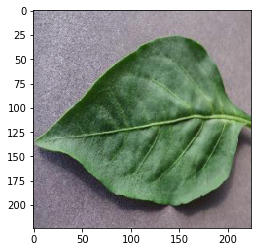

In [10]:
#displaying the image 0
image_sam=train_data[0][0].numpy().T# converting into 224,224,3
mean=np.array([0.485,0.456,0.406])
std=np.array([0.220,0.224,0.225])
inpimg=std*image_sam+mean
inpimg=np.clip(inpimg,0,1)
plt.imshow(inpimg)
#plt.title(idx_to_class(train_data[0][1]))

In [11]:
# data loader
#shuffles the data and creates batches
#if data sets are large we like to create batches
# num of workers is for multi processing
#list will be returned of x and y tensors
dataLoadTrain=DataLoader(train_data,batch_size=10,shuffle=True,num_workers=2)
dataloadTest=DataLoader(test_data,batch_size=10,shuffle=True,num_workers=2)

In [12]:
#train_loader=iter(dataLoadTrain)
#x,y=next(train_loader)

In [13]:
#building network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()#do not forget superint
        self.fc1 = nn.Linear(224*224*3, 64)# fc means fully connected layer flattening output can be anything
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 3)# 3 because three classes output layer is 3
 #relu works best for images mostly 
# activation function at end could be sigmoid or softmax
    def forward(self, x):
        x = F.relu(self.fc1(x))#self passes through fc1 and relu are the activation functions
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)# we do not run relu here
        return F.log_softmax(x, dim=1)#softmax usually works for the multiclass #dim 1 for dimension 1 flattening

In [14]:
net=Net()
print(net) 

Net(
  (fc1): Linear(in_features=150528, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=3, bias=True)
)


In [17]:
#passing some data through the neural network
X_dat=torch.rand(224,224,3)
X_dat=X_dat.view(-1,224*224*3)# -1 specifies that the input is some random shape

In [19]:
output=net(X_dat)

In [17]:
output#first few passes through neural network is useless but 3 means 3 classes

tensor([[-1.0708, -1.0715, -1.1559]], grad_fn=<LogSoftmaxBackward>)

In [22]:
loss_criterion = nn.CrossEntropyLoss()
optimizer=optim.Adam(net.parameters(),lr=0.001)#this means neural net parameters and learning rate

In [23]:
EPOCHS=3 # whole pass through our data
for epouch in range(EPOCHS):
    for data in dataLoadTrain:#data is a a batch form list form  
        X, y = data# these are batches in 10  
        net.zero_grad()#we need this to calculate for 10 then 0 the grad   
        output = net(X.view(-1,224*224*3)) 
        #output=output.reshape(10,3*3)
        loss = F.nll_loss(output, y)#loss
        loss.backward() #backpropagation 
        optimizer.step() #this adjusts the weights for us 
    print(loss)  

tensor(0.4686, grad_fn=<NllLossBackward>)
tensor(0.2169, grad_fn=<NllLossBackward>)
tensor(0.5192, grad_fn=<NllLossBackward>)


In [42]:
#dataloadTest
correct=0
total=0
with torch.no_grad():
    for data in dataLoadTrain:
        X,y=data
        output=net(X.view(-1,224*224*3))
        for idx,i in enumerate(output):
            if torch.argmax(i)==y[idx]:
                correct+=1
            total+=1
print("Accuracy",correct/total)

Accuracy 0.9472222222222222


In [43]:
correct=0
total=0
with torch.no_grad():
    for data in dataloadTest:
        X,y=data
        output=net(X.view(-1,224*224*3))
        for idx,i in enumerate(output):
            if torch.argmax(i)==y[idx]:
                correct+=1
            total+=1
print("Accuracy",correct/total)

Accuracy 0.8111111111111111
